<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Final Project Submission</a></span></li></ul></li><li><span><a href="#Predicting-Home-Price-in-King-County" data-toc-modified-id="Predicting-Home-Price-in-King-County-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predicting Home Price in King County</a></span><ul class="toc-item"><li><span><a href="#Business-Case" data-toc-modified-id="Business-Case-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Business Case</a></span></li><li><span><a href="#&quot;Data-Mining&quot;" data-toc-modified-id="&quot;Data-Mining&quot;-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>"Data Mining"</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Null-Values" data-toc-modified-id="Null-Values-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Null Values</a></span><ul class="toc-item"><li><span><a href="#Yr_renovated:" data-toc-modified-id="Yr_renovated:-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Yr_renovated:</a></span></li><li><span><a href="#Waterfront:" data-toc-modified-id="Waterfront:-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Waterfront:</a></span></li><li><span><a href="#View:" data-toc-modified-id="View:-1.3.1.3"><span class="toc-item-num">1.3.1.3&nbsp;&nbsp;</span>View:</a></span></li></ul></li><li><span><a href="#Duplicates,-Outliers-and-Extraneous-Values-and-DateTime" data-toc-modified-id="Duplicates,-Outliers-and-Extraneous-Values-and-DateTime-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Duplicates, Outliers and Extraneous Values and DateTime</a></span><ul class="toc-item"><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Duplicates</a></span></li><li><span><a href="#Outliers-and-Extraneous-values" data-toc-modified-id="Outliers-and-Extraneous-values-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>Outliers and Extraneous values</a></span></li><li><span><a href="#DateTime" data-toc-modified-id="DateTime-1.3.2.3"><span class="toc-item-num">1.3.2.3&nbsp;&nbsp;</span>DateTime</a></span></li></ul></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Target-Exploration" data-toc-modified-id="Target-Exploration-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Target Exploration</a></span></li><li><span><a href="#Feature-Exploration" data-toc-modified-id="Feature-Exploration-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Feature Exploration</a></span><ul class="toc-item"><li><span><a href="#Price-vs.-Location" data-toc-modified-id="Price-vs.-Location-1.4.2.1"><span class="toc-item-num">1.4.2.1&nbsp;&nbsp;</span>Price vs. Location</a></span></li><li><span><a href="#Price-vs.-Size" data-toc-modified-id="Price-vs.-Size-1.4.2.2"><span class="toc-item-num">1.4.2.2&nbsp;&nbsp;</span>Price vs. Size</a></span></li><li><span><a href="#Price-vs.-Quality" data-toc-modified-id="Price-vs.-Quality-1.4.2.3"><span class="toc-item-num">1.4.2.3&nbsp;&nbsp;</span>Price vs. Quality</a></span></li><li><span><a href="#Price-vs.-Date-Sold" data-toc-modified-id="Price-vs.-Date-Sold-1.4.2.4"><span class="toc-item-num">1.4.2.4&nbsp;&nbsp;</span>Price vs. Date Sold</a></span></li><li><span><a href="#Price-vs.-View" data-toc-modified-id="Price-vs.-View-1.4.2.5"><span class="toc-item-num">1.4.2.5&nbsp;&nbsp;</span>Price vs. View</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Categorical-Variables" data-toc-modified-id="Categorical-Variables-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Categorical Variables</a></span><ul class="toc-item"><li><span><a href="#Identifying-Categorical-Variables" data-toc-modified-id="Identifying-Categorical-Variables-1.5.1.1"><span class="toc-item-num">1.5.1.1&nbsp;&nbsp;</span>Identifying Categorical Variables</a></span></li><li><span><a href="#Transforming-Categorical-Variables" data-toc-modified-id="Transforming-Categorical-Variables-1.5.1.2"><span class="toc-item-num">1.5.1.2&nbsp;&nbsp;</span>Transforming Categorical Variables</a></span></li></ul></li><li><span><a href="#Multicollinearity-of-Features" data-toc-modified-id="Multicollinearity-of-Features-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Multicollinearity of Features</a></span></li><li><span><a href="#Feature-Scaling-and-Normalization" data-toc-modified-id="Feature-Scaling-and-Normalization-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Feature Scaling and Normalization</a></span></li></ul></li><li><span><a href="#Predictive-Modeling" data-toc-modified-id="Predictive-Modeling-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Predictive Modeling</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

## Final Project Submission

Please fill out:
* Student name: Lauren Aronson
* Student pace: Full Time
* Scheduled project review date/time: Monday 9/9 @ 12:00pm MT
* Instructor name: Victor Geislinger
* Blog post URL:


# Predicting Home Price in King County 

## Business Case
Our business case for the King County Home Sales dataset

The objective for this project is to explore King County House Sales data to determine which features predict the price of homes in the county.  In particular, there are various categories of features that can and/or could predict the price of homes.  These include: size, quality, location, timing (when a house is sold), how many views, etc.  

Our stakeholders own a real estate company in King County.  They would like to determine criteria they could really focus on to make their business successful.  Success to our stakeholders is to obtain sellers who have higher priced homes, which allows them to obtain a larger commission.  

Using the King County House Sales data provided, we will determine which criteria our stakeholders should focus on to obtain their definition of success.

## "Data Mining"

Import Libraries & View Initial Dataset

In [1]:
#Import Python Libraries 
from IPython.display import Markdown as md
import pandas as pd
import numpy as np
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import Data and view first 5 columns
data_init = pd.read_csv('kc_house_data.csv')
data_init.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#review information to analyze dataset
data_init.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
# Return additional data information (data length, null values)
init_data_size = len(data_init)
print(init_data_size)
data_init.isna().sum()

21597


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Findings: 
- There are 21,597 total records
- Most data is an int64 or float64
- There are 2 objects - date and sqft_basement
- Null values exist for waterfront, view and yr_renovated

## Data Cleaning
Clean data for Null Values, Duplicates, Outliers and Extraneous Values and DateTime

### Null Values
After analyzing the initial dataset, it appears there are null values existing for "yr_renovated", "waterfront" and "view".  After taking a look at each of these columns the data was updated as follows for each feature:

In [5]:
#calculated percentage of missing data for each feature that has null values
#to help decide if we should remove, replace or keep the null values 
yr_ren_miss_perc = str(round(len(data_init[data_init.yr_renovated.isna()])/len(data_init),3)*100)
waterfront_miss_perc = str(round(len(data_init[data_init.waterfront.isna()])/len(data_init),3)*100)
view_miss_perc = str(round(len(data_init[data_init.view.isna()])/len(data_init),3)*100)

print('yr_renovated missing data: ', yr_ren_miss_perc + '%')
print('waterfront missing data: ', waterfront_miss_perc + '%')
print('view missing data: ', view_miss_perc + '%')

yr_renovated missing data:  17.8%
waterfront missing data:  11.0%
view missing data:  0.3%


#### Yr_renovated:

In [6]:
#Look at how many unique values exist for yr_renovated 
yr_ren_unique = data_init['yr_renovated'].nunique()
print('unique yr_renovated values =', yr_ren_unique)

unique yr_renovated values = 70


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

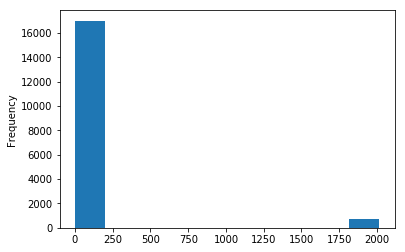

In [7]:
#Look at yr_renovated histogram and value counds 
data_init.yr_renovated.plot(kind = 'hist')  
data_init.yr_renovated.value_counts() #it looks like most houses have not been renovated

In [8]:
#determine percentage of 0.0 and 2014 - first and second largest categrories
yr_ren_zero = str(round((data_init[data_init['yr_renovated'] == 0.0].count()['yr_renovated'] 
                         / len(data_init)),2) * 100)
print('percentage of yr_renovated 0.0 values =', yr_ren_zero + '%')

yr_ren_2014 = str(round((data_init[data_init['yr_renovated'] == 2014].count()['yr_renovated'] 
                         / len(data_init)),3) * 100)
print('percentage of yr_renovated 2014 values =', yr_ren_2014 + '%')

percentage of yr_renovated 0.0 values = 79.0%
percentage of yr_renovated 2014 values = 0.3%


In [9]:
md('Findings: Approximately {}% of "yr_renovated" data have null values. There are {} unique data types'.format(yr_ren_miss_perc, yr_ren_unique)
   + ' for this column and when taking a closer look at the unique values and using a histogram plot,' 
   + ' it appears {}% of these values were set to 0.0 (not renovated), with the next largest equal to the year 2014 ({}%).'.format(yr_ren_zero, yr_ren_2014)
   + '  Therefore, since 0.0 makes up such a large percentage of the data, we will assume these null values were houses not renovated and change them to 0.0.')

Findings: Approximately 17.8% of "yr_renovated" data have null values. There are 70 unique data types for this column and when taking a closer look at the unique values and using a histogram plot, it appears 79.0% of these values were set to 0.0 (not renovated), with the next largest equal to the year 2014 (0.3%).  Therefore, since 0.0 makes up such a large percentage of the data, we will assume these null values were houses not renovated and change them to 0.0.

In [10]:
#produce a set new dataframe as we start to make edit 
data = data_init 

#reorder columns to get price (target variable) at the beginning
cols = list(data.columns.values) #Make a list of all of the columns in the data
cols.pop(cols.index('price')) #Remove price from list
cols.pop(cols.index('id')) #Remove id from list
data = data[['id', 'price'] + cols] #Create new dataframe with id then price at the beginning

#set id as index
data = data.set_index('id')
data.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,10/13/2014,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,538000.0,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,180000.0,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,604000.0,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,510000.0,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [11]:
# change null to 0 for yr_renovated
data['yr_renovated'] = data['yr_renovated'].fillna(value = 0.0)
data['yr_renovated'].value_counts() #check

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

#### Waterfront:

In [12]:
#Look at how many unique values exist for waterfront
waterfront_unique = data['waterfront'].nunique()
print('unique waterfront values =', waterfront_unique)

unique waterfront values = 2


In [13]:
#Look into waterfront's values further
data.waterfront.value_counts() 

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [14]:
#determine percentage of 0.0 and 1.0 

waterfront_zero = str(round((data[data['waterfront'] == 0.0].count()['waterfront'] 
                         / len(data)),2) * 100)
print('percentage of waterfront 0.0 values =', waterfront_zero + '%')

waterfront_one = str(round((data[data['waterfront'] == 1.0].count()['waterfront'] 
                         / len(data)),2) * 100)
print('percentage of waterfront 1.0 values =', waterfront_one + '%')

percentage of waterfront 0.0 values = 88.0%
percentage of waterfront 1.0 values = 1.0%


In [15]:
md('Findings: Approximately {}% of "waterfront" data have null values. There are {} different data types'.format(waterfront_miss_perc, waterfront_unique)
   + ' for this column and when taking a closer look at the unique values' 
   + ' it appears {}% of these values are equal to 0.0 and {}% are equal to 1.0.'.format(waterfront_zero, waterfront_one)
   + ' Therefore, since the majority is equal to 0.0, the null values will be replaced with 0.0 here.')

Findings: Approximately 11.0% of "waterfront" data have null values. There are 2 different data types for this column and when taking a closer look at the unique values it appears 88.0% of these values are equal to 0.0 and 1.0% are equal to 1.0. Therefore, since the majority is equal to 0.0, the null values will be replaced with 0.0 here.

In [16]:
#Set the null values equal to 0.0 for waterfront
data['waterfront'] = data['waterfront'].fillna(value = 0.0)
data.isna().sum() #check

price             0
date              0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

#### View:

In [17]:
#Look at how many unique values exist for view
view_unique = data['view'].nunique()
print('unique view values =', view_unique)

unique view values = 5


In [18]:
#Look into views's values further
data.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [19]:
#determine percentage of 0.0

view_zero = str(round((data[data['view'] == 0.0].count()['view'] 
                         / len(data)),2) * 100)
print('percentage of view 0.0 values =', view_zero + '%')

percentage of view 0.0 values = 90.0%


In [20]:
md('Findings: Approximately {}% of the "view" data have null values.'.format(view_miss_perc) 
   + ' It appears most houses were viewed 0 times (at {}%), ranging from 0-4 times in total.'.format(view_zero)
   + ' However, since this was such a low percentage of the overall dataset,' 
   + ' the rows with null values will be dropped from the dataset.') 

Findings: Approximately 0.3% of the "view" data have null values. It appears most houses were viewed 0 times (at 90.0%), ranging from 0-4 times in total. However, since this was such a low percentage of the overall dataset, the rows with null values will be dropped from the dataset.

In [21]:
#Drop the null view values from the data
data = data.dropna(subset=['view'])
data.isna().sum() #check

price            0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Duplicates, Outliers and Extraneous Values and DateTime

After cleaning the data for null values, the next step is to look through the data for any strange occurances. Please see as follows:

In [22]:
#relook at data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
price            21534 non-null float64
date             21534 non-null object
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


#### Duplicates

Determined there are no duplicates in the data

In [23]:
#check for duplicates - there are none!
duplicates = data[data.duplicated()]
print(len(duplicates))

0


Findings: There were no duplicate records

#### Outliers and Extraneous values
- Bedrooms
- Bathrooms
- Sqft_basement
- Sqft_lot and Sqft_lot15
- Price

In [24]:
#check for outliers and extraneous values 
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.006734,0.233863,3.409724,7.657425,1788.557537,1971.002275,68.866722,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.081783,0.765686,0.650654,1.172643,827.745641,29.376044,364.314552,53.506639,0.138528,0.140735,685.121001,27255.483308
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [25]:
#Bedrooms: 33 bedrooms seems like an error, inspected data further to decide if should remove
data.bedrooms.value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [26]:
#Bedrooms: decided should drop the homes with over 9 bedrooms to get rid of outliers
data.drop(data[data['bedrooms'] > 9].index, inplace = True) 
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.152900e+04,21529.000000,21529.000000,21529.000000,2.152900e+04,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000,21529.000000
mean,5.400149e+05,3.370384,2.115507,2079.579776,1.509236e+04,1.494101,0.006735,0.233824,3.409634,7.657485,1788.470807,1971.007432,68.789865,98077.942403,47.560167,-122.213938,1986.327883,12752.381764
std,3.660761e+05,0.899351,0.768343,917.289570,4.138482e+04,0.539814,0.081793,0.765674,0.650602,1.172709,827.759341,29.372903,364.118088,53.507301,0.138540,0.140741,685.155187,27258.466847
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,7.700000e+06,9.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Findings: The data shows 5 homes with over 9 bedrooms.  As these points are outliers it was decided to remove them from the dataset

In [27]:
#Bathrooms: looked at data for amount of bathrooms
data.bathrooms.value_counts()

2.50    5364
1.00    3841
1.75    3034
2.25    2037
2.00    1925
1.50    1441
2.75    1185
3.00     750
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      12
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [28]:
#Bathrooms: decided should drop the homes with over 6 bathrooms to get rid of outliers
data.drop(data[data['bathrooms'] > 6].index, inplace = True) 
data.bathrooms.value_counts()

2.50    5364
1.00    3841
1.75    3034
2.25    2037
2.00    1925
1.50    1441
2.75    1185
3.00     750
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      12
5.50      10
1.25       9
6.00       5
0.50       4
5.75       4
Name: bathrooms, dtype: int64

Findings: The data shows 8 homes with over 6 bathrooms.  As these points are outliers it was decided to remove them from the dataset

In [29]:
#sqft_basement: determine why sqft_basement is an object
data['sqft_basement'].unique() #it appears like a ? exists in the data

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0',
       '530.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0',
       '1100.0', '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', 

In [30]:
#sqft_basement: determine percentage of 0 and ? - first and second largest categrories

sqft_bas_zero = str(round((data[data['sqft_basement'] == '0.0'].count()['sqft_basement'] 
                         / len(data)),2) * 100)
print('percentage of sqft_basement 0.0 values =', sqft_bas_zero + '%')

sqft_bas_q = str(round((data[data['sqft_basement'] == '?'].count()['sqft_basement'] 
                         / len(data)),2) * 100)
print('percentage of sqft_basement ? values =', sqft_bas_q + '%')

percentage of sqft_basement 0.0 values = 59.0%
percentage of sqft_basement ? values = 2.0%


In [31]:
md('Findings: Sqft_basement is an object.  Taking a look at the unique values,'
   + ' there is a ? listed for {}% of the data.  Overall {}% of the data is equal to 0.0 (having no basement).'.format(sqft_bas_q,sqft_bas_zero)
   + ' Therefore, the ? has been set equal to 0.0.  This field has also been changed to a float.')

Findings: Sqft_basement is an object.  Taking a look at the unique values, there is a ? listed for 2.0% of the data.  Overall 59.0% of the data is equal to 0.0 (having no basement). Therefore, the ? has been set equal to 0.0.  This field has also been changed to a float.

In [32]:
# sqft_basement: updated ? to 0.0 and changed the type to a float
data.loc[data['sqft_basement'] == '?','sqft_basement'] = '0.0'
data['sqft_basement'].unique() # check
data['sqft_basement'] = data['sqft_basement'].astype(float) #change field to a float

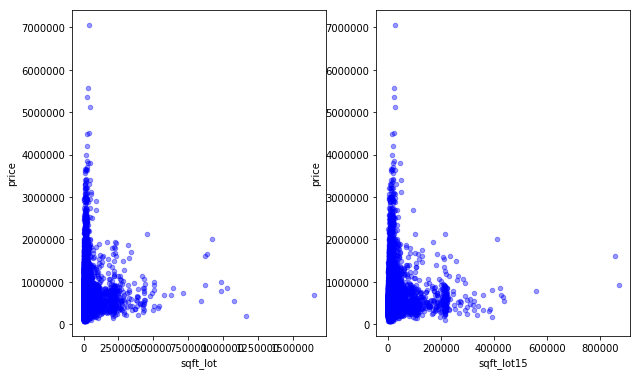

In [33]:
#sqft_lot and sqft_lot15: based on scatter charts it appears sqft_lot and sqft_lot15 
#have some large outliers (see below) - will remove them
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

for xcol, ax in zip(['sqft_lot', 'sqft_lot15'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Findings: it appears sqft_lot and sqft_lot15 have substantial outliers looking at the scatter plots.  Based on these plots, decided to remove the outliers that had above 500,000 in sqft for each.  This totaled to 22 records.

In [34]:
#sqft_lot and sqft_lot15: removed outliers above 500,000 (22 in total, most repeats)
print(data.loc[data['sqft_lot'] > 500000].count()['sqft_lot'])
data.drop(data[data['sqft_lot'] > 500000].index, inplace = True) 

print(data.loc[data['sqft_lot15'] > 500000].count()['sqft_lot15'])
data.drop(data[data['sqft_lot15'] > 500000].index, inplace = True)

21
1


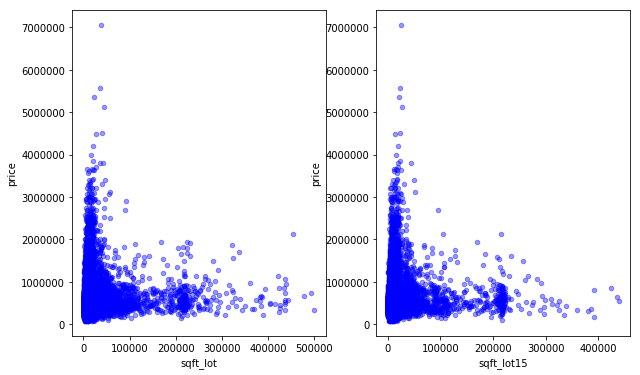

In [35]:
#check updated charts - looks a lot better!
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

for xcol, ax in zip(['sqft_lot', 'sqft_lot15'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

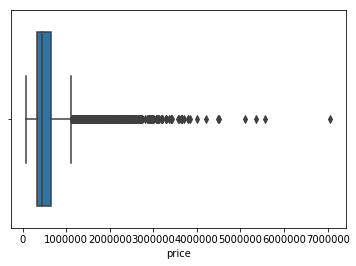

In [36]:
#price: running boxplot on price
sns.boxplot(data['price'])

Findings: it appears price has substantial outliers looking at the box plot.  Based on this plots, decided to remove the outliers that had above 4,000,000 in price.  This totaled to 7 records.

In [37]:
#Price: checking count of data above 4M in price
data[data['price'] > 4000000].count()['price']

7

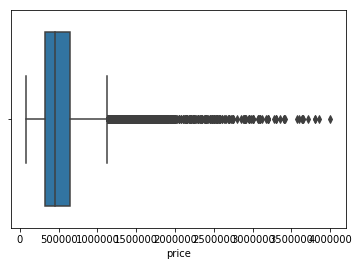

In [38]:
#Price: dropped outliers above 4M in price
data.drop(data[data['price'] > 4000000].index, inplace = True)
sns.boxplot(data['price'])

#### DateTime

In [39]:
#split date to analyze data and changed to type to datetime
import datetime
data['date'] = pd.to_datetime(data['date'])
data['yr_sold'] = pd.DatetimeIndex(data['date']).year
data['mo_yr_sold'] = pd.to_datetime(data['date']).dt.to_period('M')
data['yr_sold'].unique() #only houses sold between 2014-2015 are being observed
data['mo_yr_sold'].unique() #only houses sold between May 2014 and May 2015 are being observed
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21490 entries, 7129300520 to 1523300157
Data columns (total 22 columns):
price            21490 non-null float64
date             21490 non-null datetime64[ns]
bedrooms         21490 non-null int64
bathrooms        21490 non-null float64
sqft_living      21490 non-null int64
sqft_lot         21490 non-null int64
floors           21490 non-null float64
waterfront       21490 non-null float64
view             21490 non-null float64
condition        21490 non-null int64
grade            21490 non-null int64
sqft_above       21490 non-null int64
sqft_basement    21490 non-null float64
yr_built         21490 non-null int64
yr_renovated     21490 non-null float64
zipcode          21490 non-null int64
lat              21490 non-null float64
long             21490 non-null float64
sqft_living15    21490 non-null int64
sqft_lot15       21490 non-null int64
yr_sold          21490 non-null int64
mo_yr_sold       21490 non-null object
dtypes: datet

Findings: Looking further into the date houses were sold, it appears the dataset is observing houses sold between 05/2014-05/2015 only.  Additionally, the format of date was updated to datetime, and another 2 fields were created to analyze the data (year sold and month/year sold).

## Data Exploration

Further exploration and visual analysis of the data

In [40]:
#reminder of the data we have in the dataset
data.columns

Index(['price', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_sold', 'mo_yr_sold'],
      dtype='object')

In [41]:
#review statistics
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
count,2.149000e+04,21490.000000,21490.000000,21490.000000,21490.000000,21490.000000,21490.000000,21490.000000,21490.000000,21490.000000,21490.000000,21490.000000,21490.000000,21490.000000,21490.000000,21490.000000,21490.000000,21490.000000,21490.000000,21490.000000
mean,5.369354e+05,3.368823,2.111785,2073.788227,14271.120335,1.493532,0.006515,0.231782,3.409865,7.653374,1783.811261,283.938623,1970.987436,68.635644,98077.996650,47.560245,-122.214132,1985.017915,12496.492369,2014.322569
std,3.474467e+05,0.896805,0.758682,897.167908,31828.605316,0.539716,0.080452,0.761665,0.650673,1.165630,814.967882,435.251766,29.368900,363.723119,53.506823,0.138491,0.140510,683.604128,24988.571967,0.467470
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,3.211452e+05,3.000000,1.750000,1420.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471300,-122.328000,1490.000000,5100.000000,2014.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7607.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1840.000000,7620.000000,2014.000000
75%,6.420000e+05,4.000000,2.500000,2550.000000,10639.750000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,540.000000,1997.000000,0.000000,98118.000000,47.678200,-122.125000,2360.000000,10073.250000,2015.000000
max,4.000000e+06,9.000000,6.000000,7880.000000,499571.000000,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,438213.000000,2015.000000


### Target Exploration

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


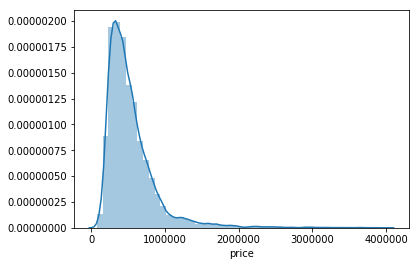

In [42]:
#view price histogram
sns.distplot(data['price']);

Findings: Looking at a histogram of price (our target variable), we see a large amount of skewness and the residuals do not appear to follow a normal distribution.  

### Feature Exploration

#### Price vs. Location

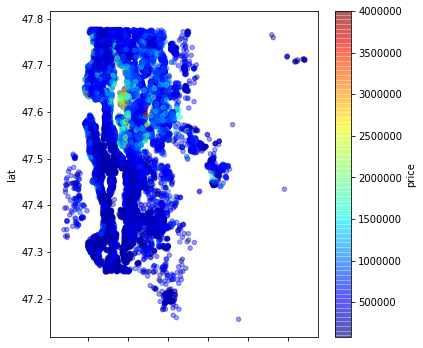

In [43]:
#Review location by latitude/longitude of entire population based on price
data.plot(kind = 'scatter', x = 'long', y = 'lat', alpha=0.4, c = 'price', 
          cmap=plt.get_cmap("jet"), colorbar=True, figsize=(6,6))
plt.show()

In [44]:
#subset the data into 3 price buckets
onemil_plus = data.loc[(data['price'] > 1000000)]
fivek_to_onemil = data.loc[(data['price'] > 500000) & (data['price'] <= 1000000)]
zero_to_fivek = data.loc[(data['price'] <= 500000)]
print('percentage sold over $1M: ', str(round(len(onemil_plus)/len(data),4)*100) + '%')
print('percentage sold between $500K and $1M: ', str(round(len(fivek_to_onemil)/len(data),4)*100) + '%')
print('percentage sold under $500K: ', str(round(len(zero_to_fivek)/len(data),4)*100) + '%')

percentage sold over $1M:  6.67%
percentage sold between $500K and $1M:  35.14%
percentage sold under $500K:  58.19%


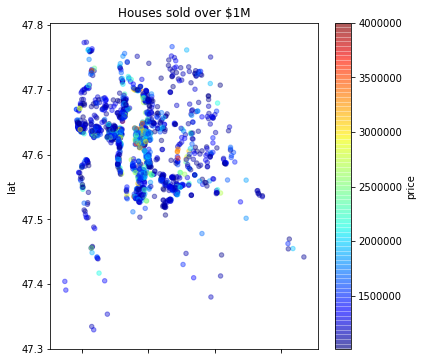

In [45]:
#look at location by latitude/longitude based on houses sold over 1M
onemil_plus.plot(kind = 'scatter', x = 'long', y = 'lat', alpha=0.4, c = 'price', 
          cmap=plt.get_cmap("jet"), colorbar=True, figsize=(6,6))
plt.title('Houses sold over $1M')
plt.show()

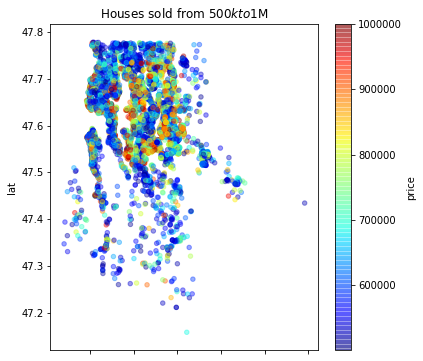

In [46]:
#look at location by latitude/longitude based on houses sold between 500K and 1M
fivek_to_onemil.plot(kind = 'scatter', x = 'long', y = 'lat', alpha=0.4, c = 'price', 
          cmap=plt.get_cmap("jet"), colorbar=True, figsize=(6,6))
plt.title('Houses sold from $500k to $1M')
plt.show()

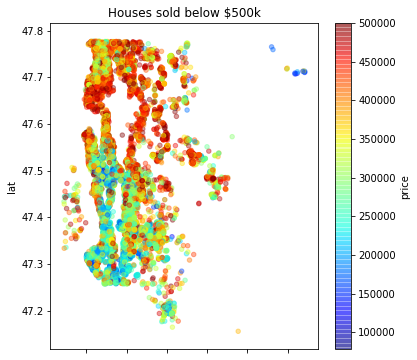

In [47]:
#look at location by latitude/longitude based on houses sold below 500K
zero_to_fivek.plot(kind = 'scatter', x = 'long', y = 'lat', alpha=0.4, c = 'price', 
          cmap=plt.get_cmap("jet"), colorbar=True, figsize=(6,6))
plt.title('Houses sold below $500k')
plt.show()

In [48]:
#Look at location by zipcodes
data['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98146, 98038,
       98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133, 98040,
       98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001,
       98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059,
       98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118,
       98199, 98032, 98045, 98102, 98077, 98198, 98108, 98168, 98177,
       98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031,
       98106, 98072, 98188, 98065, 98014, 98055, 98039])

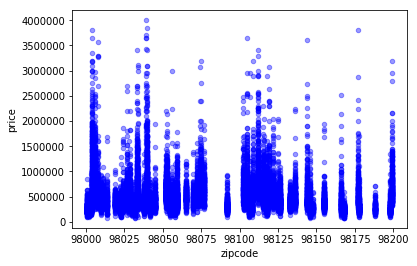

In [49]:
#look to see if there is a correlation between price and zipcode
data.plot(kind='scatter', x='zipcode', y='price', alpha=0.4, color='b')

In [50]:
#import a list of cities by zipcode based on internet data
cities = pd.read_excel('/Users/lauren/Desktop/FlatironCourseMaterial/Module-1-Final-Project/dsc-v2-mod1-final-project-online-ds-ft-081219/cities.xlsx')
cities.head() #check

,zipcode,city
0,98001,Lakeland North
1,98002,Auburn
2,98003,Federal Way
3,98004,Bellevue
4,98005,Bellevue


In [51]:
#merge the dataframes for analysis
data_cities = pd.merge(data, cities, on='zipcode')
data_cities.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mo_yr_sold,city
0,221900.0,2014-10-13,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,2014-10,Bryn Mawr-Skyway
1,205425.0,2014-06-23,2,1.00,880,6780,1.0,0.0,0.0,4,...,1945,0.0,98178,47.5009,-122.248,1190,6780,2014,2014-06,Bryn Mawr-Skyway
2,445000.0,2014-07-17,3,2.25,2100,8201,1.0,0.0,2.0,3,...,1967,0.0,98178,47.5091,-122.244,2660,8712,2014,2014-07,Bryn Mawr-Skyway
3,236000.0,2014-09-25,3,1.00,1300,5898,1.0,0.0,0.0,3,...,1961,0.0,98178,47.5053,-122.255,1320,7619,2014,2014-09,Bryn Mawr-Skyway
4,170000.0,2015-02-27,2,1.00,860,5265,1.0,0.0,0.0,3,...,1931,0.0,98178,47.5048,-122.272,1650,8775,2015,2015-02,Bryn Mawr-Skyway


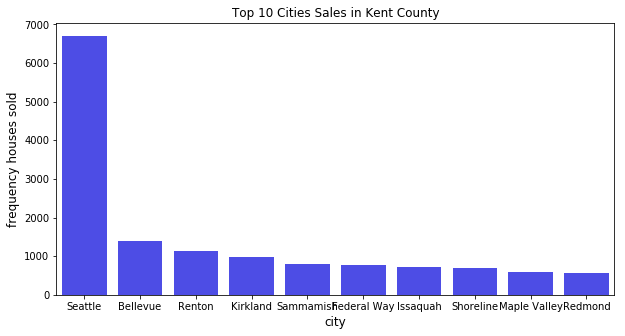

In [52]:
#look at which top 10 cities had the greatest frequency of sales to narrow down important insights
city_count  = data_cities['city'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8, color = 'blue')
plt.title('Top 10 Cities Sales in Kent County')
plt.ylabel('frequency houses sold', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

In [53]:
#convert city_count to a list 
city_count_list = city_count.index.tolist()
data_cities_analysis = data_cities.loc[data_cities['city'].isin(city_count_list)]
data_cities_analysis['city'].unique() #check

array(['Seattle', 'Sammamish', 'Federal Way', 'Maple Valley', 'Bellevue',
       'Redmond', 'Issaquah', 'Renton', 'Kirkland', 'Shoreline'],
      dtype=object)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'average price')

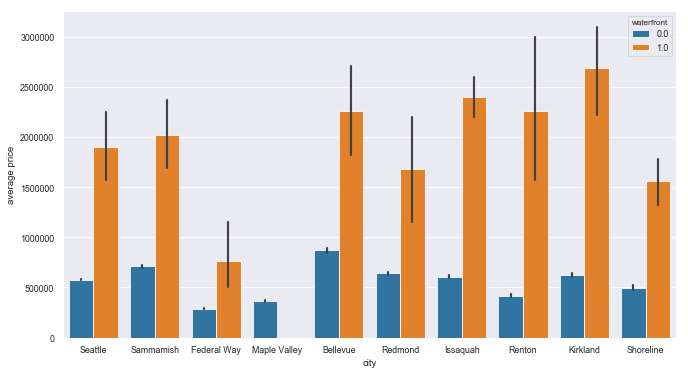

In [54]:
#review variation of price for these top 10 cities split between waterfront and non-waterfront homes
plt.figure(figsize=(11, 6))
sns.set_context('paper')
sns.set_style('darkgrid')
sns.barplot(x='city', y='price', hue = 'waterfront', data = data_cities_analysis)
plt.ylabel('average price')

Findings: 
- Looking at the price compared to latitude and longitude we see that the middle top area of Kings County has the highest priced sold houses during 05/14 - 05/15.  This remains consistent as we break the data up into our 3 price categories
- Price varies greatly based on zip code, there doesn't appear to be a strong correlation
- Gathering city data by zip code we can see, based on the top 10 cities houses were sold in during 05/14 - 05/15, there was a big variation in price due to waterfront properties vs those not on the waterfront when we look at the average prices of homes sold.  

#### Price vs. Size

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


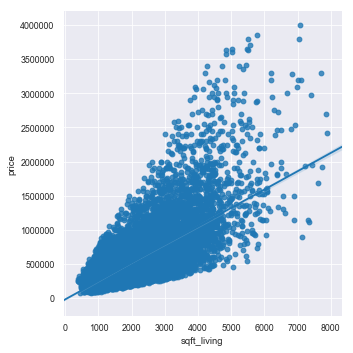

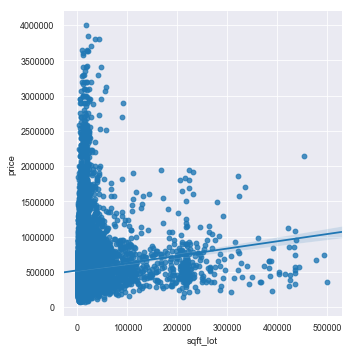

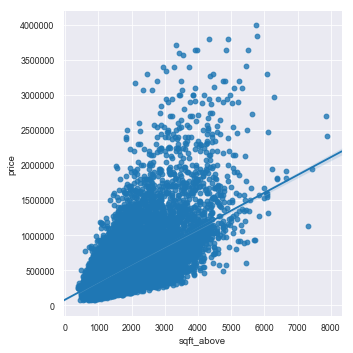

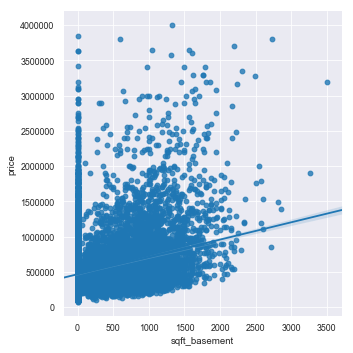

In [55]:
#review regression scatter charts for sqft features of homes
for xcol in ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']:
    sns.lmplot(x=xcol, y="price", data=data)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


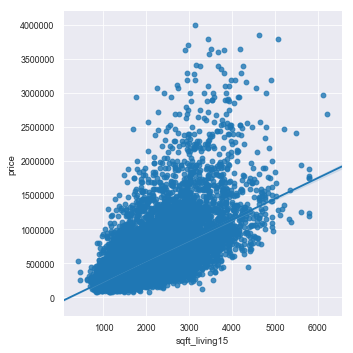

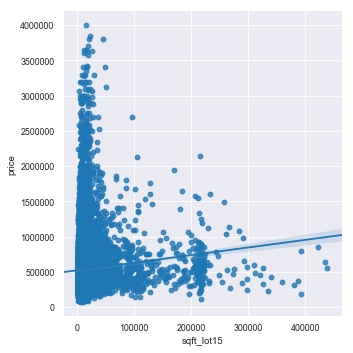

In [56]:
#review regression scatter charts for sqft fields of homes for nearest 15 neighbors
for xcol in ['sqft_living15', 'sqft_lot15']:
    sns.lmplot(x=xcol, y="price", data=data)

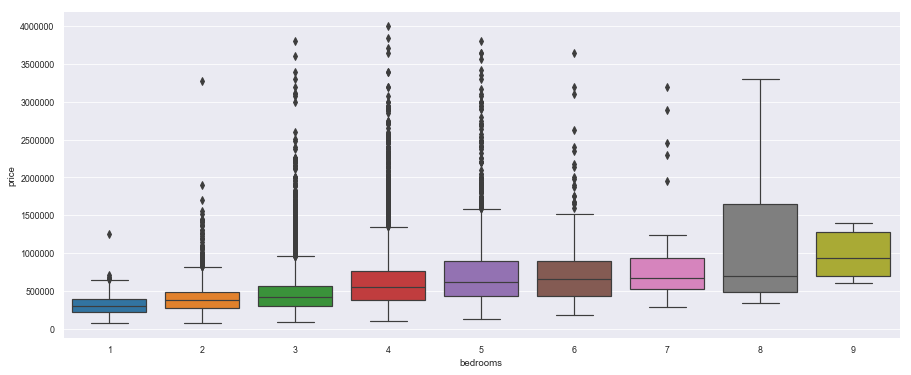

In [57]:
#review boxchart for bedrooms
plt.figure(figsize=(15, 6))
bedrooms = sns.boxplot(x='bedrooms', y="price", data=data)

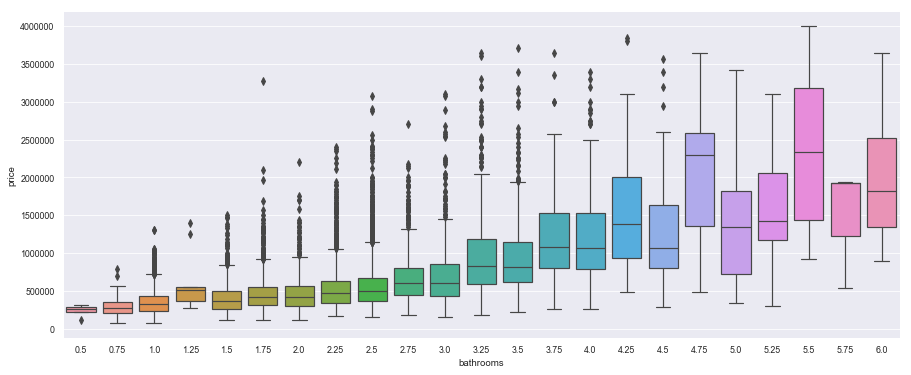

In [58]:
#review boxchart for bathrooms
plt.figure(figsize=(15, 6))
bedrooms = sns.boxplot(x='bathrooms', y="price", data=data)

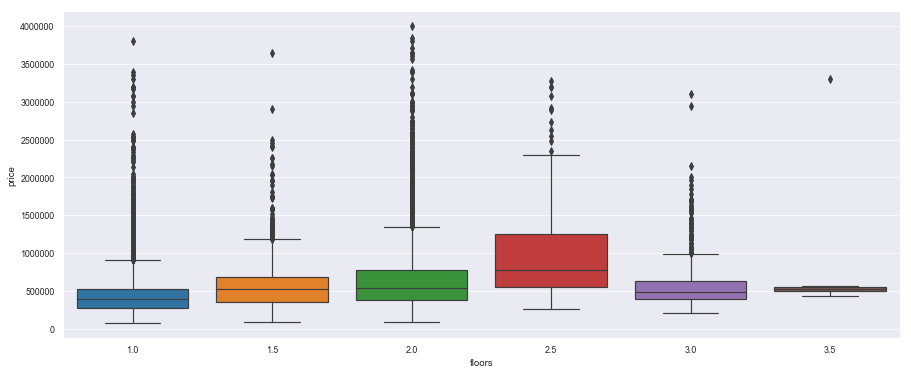

In [59]:
#review boxchart for floors
plt.figure(figsize=(15, 6))
bedrooms = sns.boxplot(x='floors', y="price", data=data)

Findings: 
- Looking at the square footage there clearly is a relationship between each field with price.  Sqft_lot and sqft_lot15 continue to show quite a few outliers even after removing some of the larger ones.  In the sqft_basement scatter chart we can see our placeholder of 0 for those that had a ? initially in the data.
- We also see an increase in price as more bedrooms and bathrooms exist in a home.  This is especially true with bathrooms.  Bedrooms start to reduce back down slightly in price after 8; however for the most part it is a continuous relationship and won't be changed to a category.  We see more volatility in price for houses with more than 4 bathrooms, but the trend is still upwards in price.
- We see prices around the same for floors, except when a home has 2.5 floors.  At that point there is a larger increase in price.

#### Price vs. Quality 

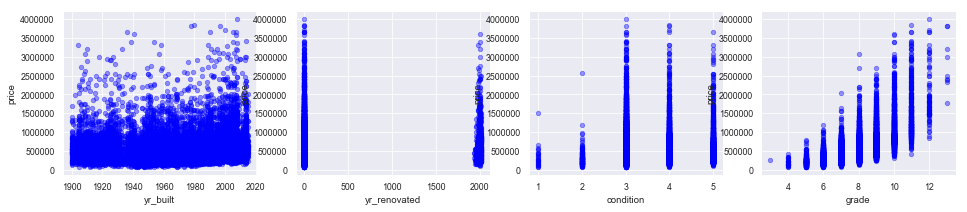

In [60]:
#Review scatter charts for insights
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['yr_built', 'yr_renovated', 'condition', 'grade'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

<Figure size 1440x2880 with 0 Axes>

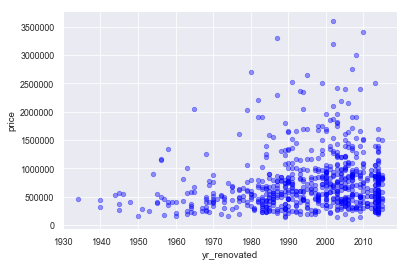

In [61]:
#review scatter for yr_renovated removing 0's
plt.figure(figsize=(20, 40))
data_yr_ren = data.loc[data['yr_renovated'] > 0]
data_yr_ren.plot(kind='scatter', x='yr_renovated', y='price', alpha=0.4, color='b')

Findings:
- There doesn't look to be a strong correlation between price and yr_built.
- Most houses were renovated after 1980 in our dataset, if they were renovated.  It looks like there is a slight increase in the price for those houses renovated later on then earlier.  There are many outliers to this data (too many that we won't remove them).
- It looks like houses with condition 3+ are more pricey then those condition 1 or 2.  There is a slight decrease after condition 3 for condition 4, and then 5. Condition will be set to a categorical variable.
- As the grade increases so does the price, these appear highly correlated. Grade will be set to a categorical variable.

#### Price vs. Date Sold

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


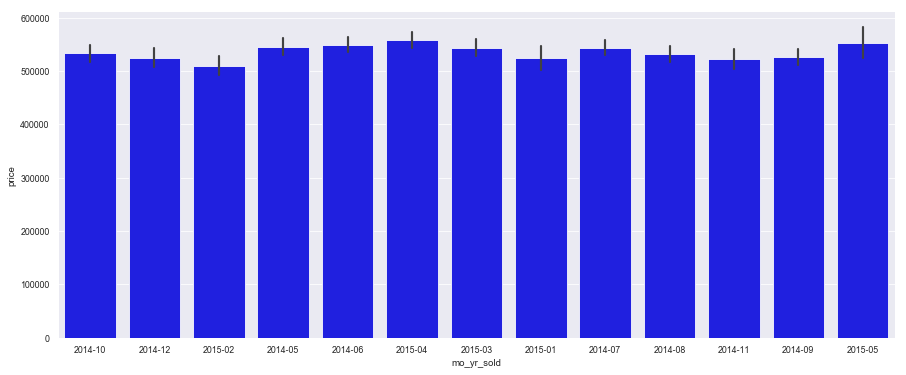

In [62]:
#review barplot for price vs date sold
plt.figure(figsize=(15, 6))
sns.barplot(x='mo_yr_sold', y='price', data = data, color='blue')

Findings: It appears there is no influence in price based on when a house was sold between 5/14 and 5/15, will drop this data for the model.

#### Price vs. View

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


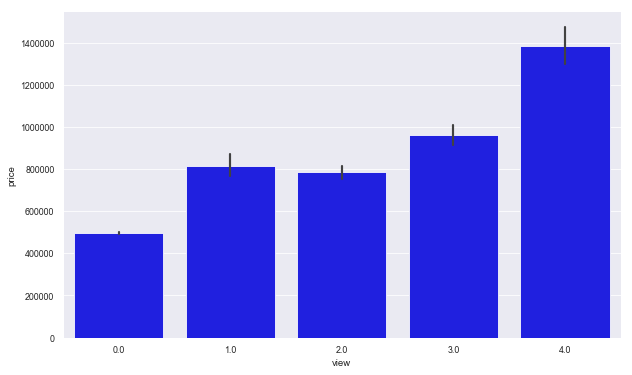

In [63]:
#review barplot for price vs view
plt.figure(figsize=(10, 6))
sns.barplot(x='view', y='price', data = data, color='blue')

Findings: It appears as view increases in value, so does price.  Therefore, we will keep this as continuous rather than making it a categorical variable.

Please note: the description of view describes the feature as "has been viewed".  It is unclear if this means the house has been viewed only 0-4 times total, it seems low, or if this stands for something else.  We would need more explanation from the data source to truly understand this field and help explain/dig deeper into our findings.  

## Feature Engineering
Setting categorical variables and looking into multicollinearity of features, feature scaling and normalization

### Categorical Variables

#### Identifying Categorical Variables

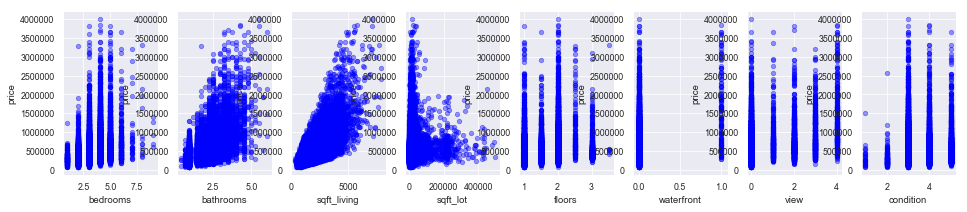

In [64]:
#view scatter charts to see if any continuous numbers are actually categorical data 
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                     'waterfront', 'view', 'condition'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

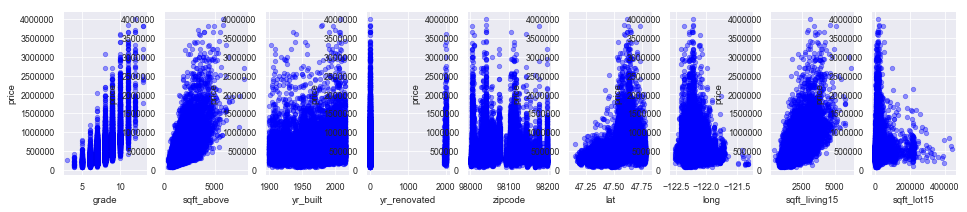

In [65]:
#view scatter charts to see if any continuous numbers are actually categorical data 
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(16,3))

for xcol, ax in zip(['grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 
                     'lat', 'long', 'sqft_living15', 'sqft_lot15'], axes):
        data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

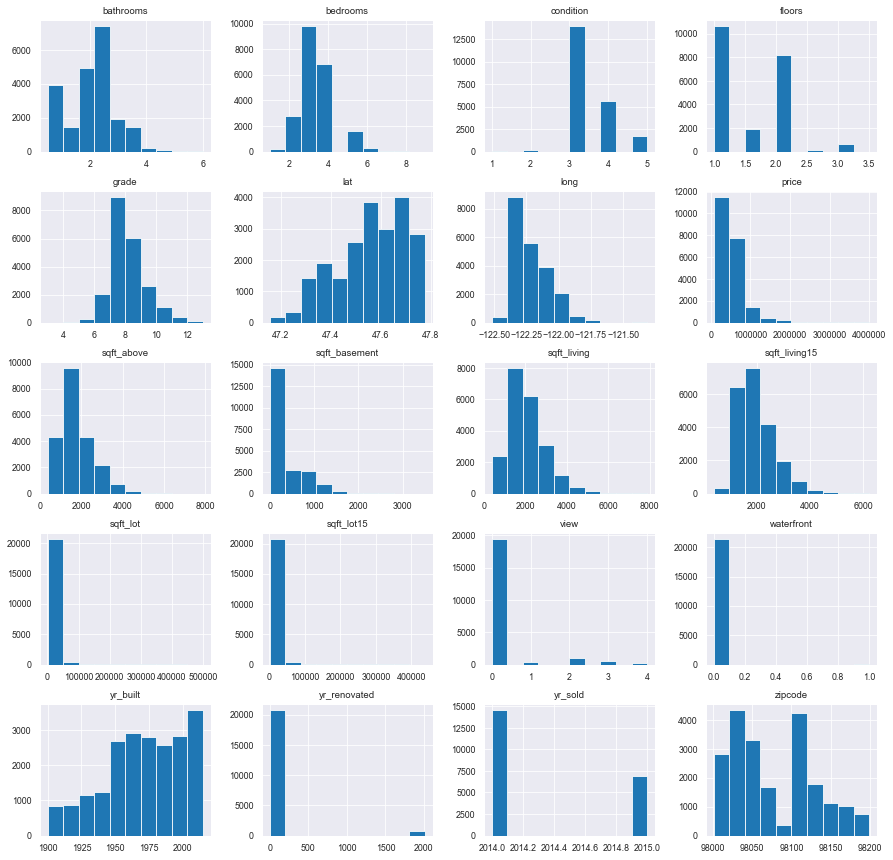

In [66]:
#viewing histograms  to see if any continuous numbers are actually categorical data 
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data.hist(ax = ax);

In [67]:
#view number of unique values for condition, grade and waterfront to determine if they should be made
#categorical variables based on the scatter charts, column name description summary and histograms
data[['condition', 'grade', 'waterfront']].nunique() #waterfront only has 2 values (0 or 1)

condition      5
grade         11
waterfront     2
dtype: int64

Findings: 
- Looking at the column name description summary provided to us, the descriptive statistics summarizing the central tendency for the continuous numbers, and by producing scatter plots and histograms, it can be concluded that "condition", "grade" and 'zipcode' will be made categorical variables.  
- Waterfront could also be considered a categorical variable (1 for waterfront home, 0 for not). However since it is binary (0 or 1) it will remain as a continuous.
- As discussed previously, since view increases with price and we don't know the true meaning behind this field, it will remain as continuous.

#### Transforming Categorical Variables

In [68]:
#Create Dummy Variables (remembering to drop the first column)
dummy_condition = pd.get_dummies(data['condition'], prefix ='cond', drop_first = True)
dummy_grade = pd.get_dummies(data['grade'], prefix ='grade', drop_first = True)
dummy_zipcode = pd.get_dummies(data['zipcode'], prefix ='zipcode', drop_first = True)

In [69]:
#drop non-dummy original condition and grade columns
data_cat = data.drop(['condition','grade', 'zipcode'], axis=1)

In [70]:
#add in condition, grade and bedroom dummy columns
data_cat = pd.concat([data_cat, dummy_condition, dummy_grade, dummy_zipcode], axis=1) 
data_cat.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,2014-10-13,3,1.00,1180,5650,1.0,0.0,0.0,1180,...,0,0,0,0,0,0,1,0,0,0
6414100192,538000.0,2014-12-09,3,2.25,2570,7242,2.0,0.0,0.0,2170,...,0,0,0,0,0,0,0,0,0,0
5631500400,180000.0,2015-02-25,2,1.00,770,10000,1.0,0.0,0.0,770,...,0,0,0,0,0,0,0,0,0,0
2487200875,604000.0,2014-12-09,4,3.00,1960,5000,1.0,0.0,0.0,1050,...,0,0,0,0,0,0,0,0,0,0
1954400510,510000.0,2015-02-18,3,2.00,1680,8080,1.0,0.0,0.0,1680,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#Check: make sure prior dataset is still the same
data.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mo_yr_sold
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,2014-10-13,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,2014-10
6414100192,538000.0,2014-12-09,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,2014-12
5631500400,180000.0,2015-02-25,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,2015-02
2487200875,604000.0,2014-12-09,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,2014-12
1954400510,510000.0,2015-02-18,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2015-02


In [72]:
#check data information again
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21490 entries, 7129300520 to 1523300157
Columns: 102 entries, price to zipcode_98199
dtypes: datetime64[ns](1), float64(9), int64(8), object(1), uint8(83)
memory usage: 5.6+ MB


Findings: Based on findings condition, grade and zipcode were set as categorical variables

### Multicollinearity of Features

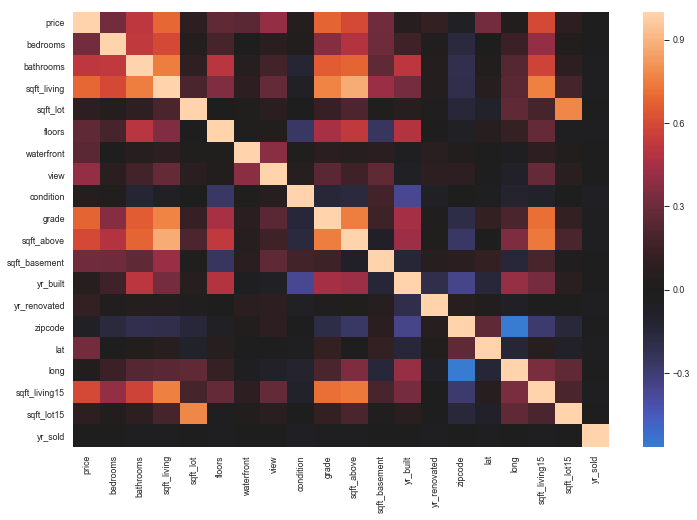

In [73]:
#look at correlations in heat map:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), center=0);

In [74]:
#look at correlations above 0.75:
abs(data.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False


Findings: Looking at the heatmap and correlation above 75%, it appears that the following features are highly correlated:

- sqft_living and sqft_living15
- sqft_living and sqft_above
- sqft_living and grade
- sqft_lot and sqft_lot15
- grade and sqft_above

In [75]:
#look at correlations for all:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
price,1.000000,0.318085,0.518586,0.693020,0.094332,0.262743,0.246228,0.395384,0.041299,0.676362,0.595784,0.307670,0.053443,0.113372,-0.051357,0.321247,0.022608,0.596704,0.077452,0.005963
bedrooms,0.318085,1.000000,0.525583,0.596050,0.045001,0.181929,-0.007505,0.076977,0.024436,0.365544,0.492386,0.298691,0.162547,0.015489,-0.159619,-0.013502,0.138591,0.404855,0.034900,-0.007846
bathrooms,0.518586,0.525583,1.000000,0.749703,0.095850,0.504868,0.052683,0.178391,-0.126045,0.662409,0.679331,0.266288,0.512199,0.044077,-0.206137,0.023200,0.226959,0.569008,0.082603,-0.025605
sqft_living,0.693020,0.596050,0.749703,1.000000,0.199607,0.355029,0.089522,0.274390,-0.058063,0.762335,0.873329,0.416284,0.322576,0.045958,-0.201900,0.051170,0.245981,0.761450,0.182493,-0.028043
sqft_lot,0.094332,0.045001,0.095850,0.199607,1.000000,-0.014352,0.020232,0.076144,-0.011024,0.129378,0.208666,0.019731,0.064555,0.011321,-0.148789,-0.092271,0.262784,0.182518,0.778364,-0.004248
floors,0.262743,0.181929,0.504868,0.355029,-0.014352,1.000000,0.020261,0.026854,-0.263968,0.458529,0.526153,-0.247853,0.489865,0.002819,-0.058840,0.049013,0.125321,0.278154,-0.017860,-0.021979
waterfront,0.246228,-0.007505,0.052683,0.089522,0.020232,0.020261,1.000000,0.379370,0.017441,0.075193,0.060241,0.071396,-0.026081,0.070057,0.030901,-0.013431,-0.037027,0.079275,0.033802,-0.003910
view,0.395384,0.076977,0.178391,0.274390,0.076144,0.026854,0.379370,1.000000,0.046899,0.244756,0.157036,0.266442,-0.055870,0.088940,0.086831,0.006398,-0.079171,0.276512,0.067097,0.001998
condition,0.041299,0.024436,-0.126045,-0.058063,-0.011024,-0.263968,0.017441,0.046899,1.000000,-0.146269,-0.158678,0.170834,-0.361237,-0.055721,0.001947,-0.014829,-0.105413,-0.092505,-0.001727,-0.045773
grade,0.676362,0.365544,0.662409,0.762335,0.129378,0.458529,0.075193,0.244756,-0.146269,1.000000,0.754109,0.155778,0.448794,0.013327,-0.185655,0.113779,0.200899,0.713089,0.116277,-0.030334


Findings: Therefore, we will now drop sqft_living, sqft_lot15 and grade since they are highly correlated other features.  

In addition, we will drop date, yr_sold, mo_yr_sold and yr_built since they are not highly correlated with price, as discovered above and during our data exploration phase.

Lastly, we will drop lat and long since we'll use zipcode (as a category) for our model.  Long also has a low correlation with price.

In [76]:
#Dropping sqft_living, sqft_lot15 and grade due to high correlations with other features.  
#Dropping 'yr_sold', 'date', 'mo_yr_sold' and 'yr_built' since they were very lowly correlated with price based on data exploration 
#Dropping lat and long since we will use zipcode in our model, and long has a low correlation with price
#Making new dataframes with these dropped
data2 = data.drop(['sqft_living', 'sqft_lot15', 'grade', 'yr_sold', 'date', 'mo_yr_sold', 'yr_built', 'lat', 'long'], axis=1)
data2_cat = data_cat.drop(['sqft_living', 'sqft_lot15', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'yr_sold', 'date', 'mo_yr_sold', 'yr_built', 'lat', 'long'], axis=1)
print(data2.columns)
print(data2_cat.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_renovated',
       'zipcode', 'sqft_living15'],
      dtype='object')
Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15',
       'cond_2', 'cond_3', 'cond_4', 'cond_5', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zip

### Feature Scaling and Normalization

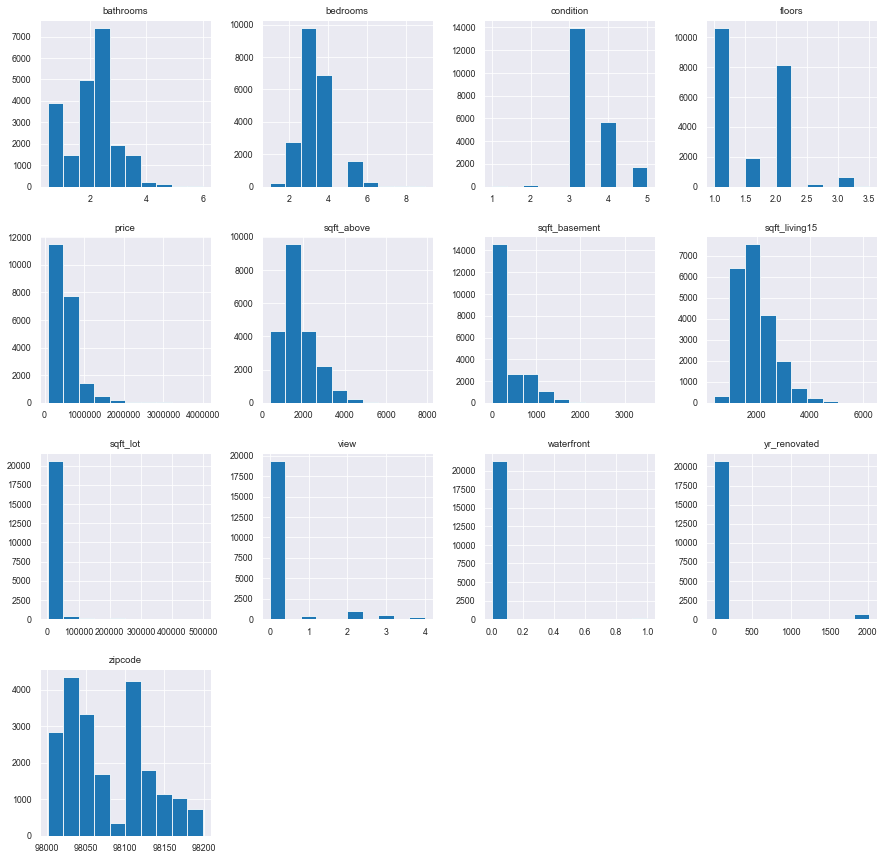

In [77]:
#viewing histograms to see if any continuous numbers are actually categorical data 
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data2.hist(ax = ax);

After testing making various features non normal to reduce skew and kurtosis, it appears that it actually increases these values while decreases the Adj R-squared value and increases p-values in some cases.  Therefore, we will not be transforming any features.

## Predictive Modeling
Time to select a model to predict home price in King County!

In [78]:
data2_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21490 entries, 7129300520 to 1523300157
Data columns (total 84 columns):
price            21490 non-null float64
bedrooms         21490 non-null int64
bathrooms        21490 non-null float64
sqft_lot         21490 non-null int64
floors           21490 non-null float64
waterfront       21490 non-null float64
view             21490 non-null float64
sqft_above       21490 non-null int64
sqft_basement    21490 non-null float64
yr_renovated     21490 non-null float64
sqft_living15    21490 non-null int64
cond_2           21490 non-null uint8
cond_3           21490 non-null uint8
cond_4           21490 non-null uint8
cond_5           21490 non-null uint8
zipcode_98002    21490 non-null uint8
zipcode_98003    21490 non-null uint8
zipcode_98004    21490 non-null uint8
zipcode_98005    21490 non-null uint8
zipcode_98006    21490 non-null uint8
zipcode_98007    21490 non-null uint8
zipcode_98008    21490 non-null uint8
zipcode_98010    21490 non-

In [79]:
from statsmodels.formula.api import ols
outcome = 'price'
predictors = data2_cat.drop(['price'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=data2_cat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1082.
Date:                Fri, 30 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:29:52   Log-Likelihood:            -2.8696e+05
No. Observations:               21490   AIC:                         5.741e+05
Df Residuals:                   21406   BIC:                         5.748e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.379e+05      3e+04     -7.919      0.000   -2.97e+05   -1.79e+05
bedrooms      -2.747e+04   1517.435    -18.106      0.000   -3.04e+04   -2.45e+04
bathrooms      2.835e+04   2340.656     12.110      0.000    2.38e+04    3.29e+04
sqft_lot          0.2537      0.037      6.872      0.000       0.181       0.326
floors        -4.031e+04   2836.885    -14.208      0.000   -4.59e+04   -3.47e+04
waterfront     6.136e+05   1.42e+04     43.063      0.000    5.86e+05    6.42e+05
view           6.378e+04   1653.620     38.570      0.000    6.05e+04     6.7e+04
sqft_above      223.7050      2.665     83.956      0.000     218.482     228.928
sqft_basement   127.7266      3.360     38.018      0.000     121.142     134.312
yr_renovated     23.5961      2.923      8.073      0.000      17.867      29.325
sqft_living15    46.4331      2.687     17.278      0.000      41.166      51.701
cond_2         9.817e+04   3.08e+04      3.189      0.001    3.78e+04    1.59e+05
cond_3         1.003e+05   2.85e+04      3.517      0.000    4.44e+04    1.56e+05
cond_4         1.219e+05   2.86e+04      4.269      0.000    6.59e+04    1.78e+05
cond_5          1.69e+05   2.87e+04      5.880      0.000    1.13e+05    2.25e+05
zipcode_98002  1.945e+04   1.35e+04      1.437      0.151   -7074.847     4.6e+04
zipcode_98003  1121.9286   1.22e+04      0.092      0.927   -2.28e+04     2.5e+04
zipcode_98004  7.927e+05    1.2e+04     66.259      0.000    7.69e+05    8.16e+05
zipcode_98005  3.417e+05   1.44e+04     23.749      0.000    3.14e+05     3.7e+05
zipcode_98006  2.975e+05   1.08e+04     27.581      0.000    2.76e+05    3.19e+05
zipcode_98007  2.768e+05   1.52e+04     18.189      0.000    2.47e+05    3.07e+05
zipcode_98008  2.732e+05   1.22e+04     22.407      0.000    2.49e+05    2.97e+05
zipcode_98010  5.714e+04   1.73e+04      3.294      0.001    2.31e+04    9.11e+04
zipcode_98011  1.288e+05   1.36e+04      9.442      0.000    1.02e+05    1.56e+05
zipcode_98014  9.059e+04   1.63e+04      5.569      0.000    5.87e+04    1.22e+05
zipcode_98019  7.424e+04   1.38e+04      5.395      0.000    4.73e+04    1.01e+05
zipcode_98022  -2.73e+04   1.31e+04     -2.084      0.037    -5.3e+04   -1627.017
zipcode_98023 -1.875e+04   1.06e+04     -1.769      0.077   -3.95e+04    2029.486
zipcode_98024  1.446e+05   1.93e+04      7.496      0.000    1.07e+05    1.82e+05
zipcode_98027  1.833e+05   1.11e+04     16.459      0.000    1.61e+05    2.05e+05
zipcode_98028  1.317e+05   1.22e+04     10.817      0.000    1.08e+05    1.56e+05
zipcode_98029  2.367e+05   1.18e+04     20.048      0.000    2.14e+05     2.6e+05
zipcode_98030  5221.6878   1.25e+04      0.418      0.676   -1.93e+04    2.97e+04
zipcode_98031  1.856e+04   1.23e+04      1.512      0.131   -5506.188    4.26e+04
zipcode_98032   2.13e+04   1.59e+04      1.337   

Findings:

With our model we have found a strong adjusted R-squared value of 0.807 and low p-values for our coefficients, without over-fitting our model.  To do so, we have concluded that the following features are helpful in predicting the price of homes in King County: 

- Size: Bedrooms, Bathrooms, Floors, Sqft_lot, Sqft_living15, Sqft_above, Sqft_basement
- Quality: Yr_renovated, Condition
- Location: Zipcodes, Waterfront
- View: Number of views (need more information on this feature from the data source)

## Conclusion 
Conclusion and recommendations

Based on our analysis, it appears that criteria within the categories of size, location, quality and view are the best predictors for the price of homes in King County.  In particular, please find which features within each category are the ones we determined as the best predictors of price: 

Home Size: 
- Number of Bedrooms
- Number of Bathrooms
- Number of Floors
- Square footage of the lot
- Square footage of the living space for the nearest 15 neighbors
- Square footage of the house (excluding the basement)
- Square footage of the basement 

Home Quality: 
- The year the house was last renovated
- How good the condition of the home is (on a scale of 1-5)

Location: 
- The zip code/city of the home 
- If the home is on the water or not

View: (need more understanding behind this feature)
- How many times the home was viewed

We recommend the sales staff focus mostly on homes that are larger in size (with comparable neighbors), have a higher condition rating, were recently renovated, and are located on the water within the cities of Bellevue, Issaquah, Renton and Kirkland.  We also recommend the sales staff focus on homes with larger views, however as mentioned we need more understanding around this feature to be able to dive any deeper into what this entails.  